![Imagen](itd.png)

# Analisis De Datos Masivos
## Contador SQL De Internet
    
## Nombre Del Docente
### Jose Gabriel Rodriguez Rivas
    
## Francisco javier Favela Najera 

In [1]:
import sqlite3
import pandas as pd
# this is a library for data vizualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline

In [4]:
conn=sqlite3.connect('InternetSpeed.db')

In [5]:
conn.cursor()

In [7]:
cur = conn.cursor()

In [10]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10;'
cur.execute(query)

In [11]:
for row in cur:
    print (row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [13]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print (row)

('2016-11-25 23:30:00.000000',)
('2016-12-08 13:00:00.000000',)
('2016-12-07 13:30:00.000000',)
('2016-12-08 23:30:00.000000',)
('2016-12-09 13:00:00.000000',)
('2016-12-11 11:00:00.000000',)
('2016-11-24 12:30:00.000000',)
('2016-11-24 01:30:00.000000',)
('2016-12-11 11:30:00.000000',)
('2016-12-04 22:00:00.000000',)


In [14]:
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [49]:
columns = [member[0] for member in cur.description]

# ignore index column
columns = columns[1:10]
columns

['Area',
 'Average_p',
 'Average_u',
 'Average_d',
 'LA',
 'LA_code',
 'Total_Population']

In [16]:
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
columns = [c.replace('_u', '') for c in columns]

    
# this operation is to remove duplicates
columns = list(set(columns))

In [17]:
columns[:10]

['E08000032',
 'E07000133',
 'E06000033',
 'E07000227',
 'E09000004',
 'E08000002',
 'E08000012',
 'E09000033',
 'E07000088',
 'E07000026']

In [19]:
area = columns[0]
print (area)

E08000032


In [20]:
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print (suffix.keys())

# we have the complete names as the values of the dictionary
print (suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E08000032')

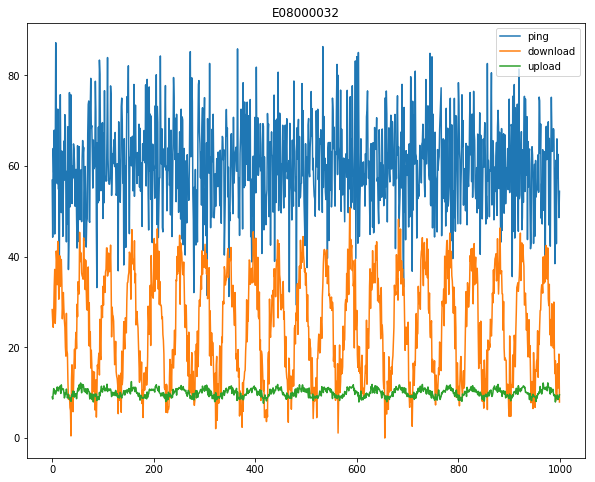

In [32]:
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area,s)
    cur.execute(query)
    plt.plot(list(cur.fetchall()), label=suffix[s])
plt.legend()
plt.title(area)

### Parte 2 Manipular Datos Con Pandas

In [33]:
new_columns = ['Area', 'Average_p', 'Average_u', 'Average_d']

df = pd.DataFrame(columns = new_columns)
df

,Area,Average_p,Average_u,Average_d


In [37]:
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i],s)        
        cur.execute(query)
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)

In [39]:
len(df)

326

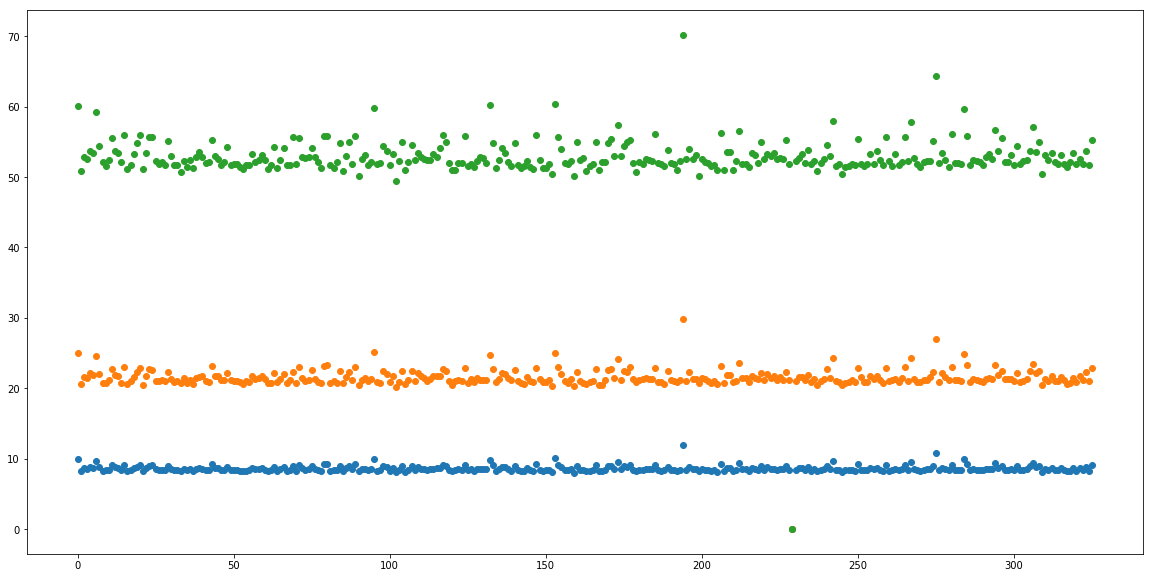

In [40]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Average_d','Average_u','Average_p']], 'o')

In [43]:
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass
df.to_sql('average_speed',conn)

In [44]:
query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E08000032', 60.06888515035256, 24.98213445275247, 9.982741753585149)
(1, 'E07000133', 50.79681827106545, 20.629943298076284, 8.181255917612752)


### Parte 3 Una las tablas con pandas

In [50]:
query = 'select * from LA_population LIMIT 10'


cur.execute(query)


for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793)
('Aberdeenshire', 'S12000034', 252973)
('Adur', 'E07000223', 61182)
('Allerdale', 'E07000026', 96422)
('Amber Valley', 'E07000032', 122309)
('Angus', 'S12000041', 115978)
('Antrim and Newtownabbey', 'N09000001', 138567)
('Ards and North Down', 'N09000011', 156672)
('Argyll and Bute', 'S12000035', 88166)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693)


In [47]:
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row)
    
    k+=1

(0, 'E08000032', 60.06888515035256, 24.98213445275247, 9.982741753585149, 'Bradford', 'E08000032', 522452)
(1, 'E07000133', 50.79681827106545, 20.629943298076284, 8.181255917612752, 'Melton', 'E07000133', 50376)
(2, 'E06000033', 52.80555545336979, 21.66228293291888, 8.651672685051029, 'Southend-on-Sea', 'E06000033', 173658)
(3, 'E07000227', 52.62173020789278, 21.45831382435831, 8.485022079295437, 'Horsham', 'E07000227', 131301)
(4, 'E09000004', 53.72425402443977, 22.18113950475821, 8.85442077171286, 'Bexley', 'E09000004', 231997)
(5, 'E08000002', 53.442651192980115, 21.93624230363881, 8.674345578856963, 'Bury', 'E08000002', 185060)
(6, 'E08000012', 59.221908415584316, 24.559427900080184, 9.727139592679135, 'Liverpool', 'E08000012', 466415)
(7, 'E09000033', 54.40596344394457, 22.086152237330072, 8.826061557686268, 'Westminster', 'E09000033', 219396)
(8, 'E07000088', 52.159555077647454, 20.821356161137263, 8.31671318145464, 'Gosport', 'E07000088', 82622)
(9, 'E07000026', 51.6188361716706